# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

## Data Preparation

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Create output directory
output_dir = 'Outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
mouse_metadata.dtypes

Mouse ID        object
Drug Regimen    object
Sex             object
Age_months       int64
Weight (g)       int64
dtype: object

In [4]:
mouse_metadata.describe()

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
study_results.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [7]:
study_results.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [8]:
# Combine the data into a single DataFrame
results_combined_df=pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
results_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Write the combined DataFrame to a CSV file within the 'Outputs' directory

# Path specification
csv_file_path = os.path.join(output_dir, 'combine_data.csv')

# Action of creating writing the dataframe to the specified folder
results_combined_df.to_csv(csv_file_path, index=False)

In [10]:
# Checking the number of mice.
number_of_mice_original=results_combined_df['Mouse ID'].nunique()
number_of_mice_original

249

In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates=results_combined_df[results_combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicates['Mouse ID'].unique()

array(['g989'], dtype=object)

In [12]:
duplicated_rows=results_combined_df[results_combined_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

print('Duplicate entries based on Mouse ID and Timepoint:')
print(duplicated_rows)

Duplicate entries based on Mouse ID and Timepoint:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
1

In [13]:
# Get unique Mouse IDs from duplicates
duplicate_mouse_ids = duplicated_rows['Mouse ID'].unique()
duplicated_timepoints=duplicated_rows['Timepoint'].unique()

print('Duplicate entries based on Mouse ID and Timepoint:')
print(duplicated_rows)
print(duplicated_timepoints)

Duplicate entries based on Mouse ID and Timepoint:
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
1

In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
unique_mouse_id=duplicated_rows['Mouse ID'].unique()
all_data_duplicate_mouse_ID=results_combined_df[results_combined_df['Mouse ID'].isin(unique_mouse_id)]

# Print all data for the specified mouse
print("Data for Mouse ID:", unique_mouse_id)
all_data_duplicate_mouse_ID


Data for Mouse ID: ['g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df=results_combined_df[~results_combined_df['Mouse ID'].isin(unique_mouse_id)]
clean_data_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [17]:
# Write the combined DataFrame to a CSV file within the 'Outputs' directory

# Path specification
csv_file_path = os.path.join(output_dir, 'clean_data.csv')

# Action of creating writing the dataframe to the specified folder
clean_data_df.to_csv(csv_file_path, index=False)

In [18]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned=clean_data_df['Mouse ID'].nunique()
number_of_mice_cleaned

248

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped_df=clean_data_df.groupby('Drug Regimen')
 
# Assemble the resulting series (mean, median, variance, standard deviation, and SEM of the tumor volume) into a single summary DataFrame.
summary_stats_df=pd.DataFrame({
    'Mean Tumor Volume': grouped_df['Tumor Volume (mm3)'].mean(),
    'Median Tumor Volume': grouped_df['Tumor Volume (mm3)'].median(),	
    'Tumor Volume Variance': grouped_df['Tumor Volume (mm3)'].var(),
    'Tumor Volume Std. Dev.': grouped_df['Tumor Volume (mm3)'].std(),
    'Tumor Volume Std. Err.': grouped_df['Tumor Volume (mm3)'].sem()
})

summary_stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Group the data by 'Drug Regimen'
grouped_regimen = clean_data_df.groupby('Drug Regimen')

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df2 = grouped_regimen['Tumor Volume (mm3)'].agg(
    Mean='mean', 
    Median='median', 
    Variance='var', 
    Std_Dev='std', 
    SEM='sem'
)

# Adding a top-level row label 'Tumor Volume (mm3)'
summary_stats_df2.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], summary_stats_df2.columns])

summary_stats_df2

Tumor Volume (mm3)                                          
                           Mean     Median   Variance   Std_Dev       SEM
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group by regimen and then count entries per regimen
regimen_counts=clean_data_df.groupby('Drug Regimen')['Mouse ID'].count()

# Sort the regimen_counts
regimen_counts_sorted=regimen_counts.sort_values(ascending=False)

regimen_counts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

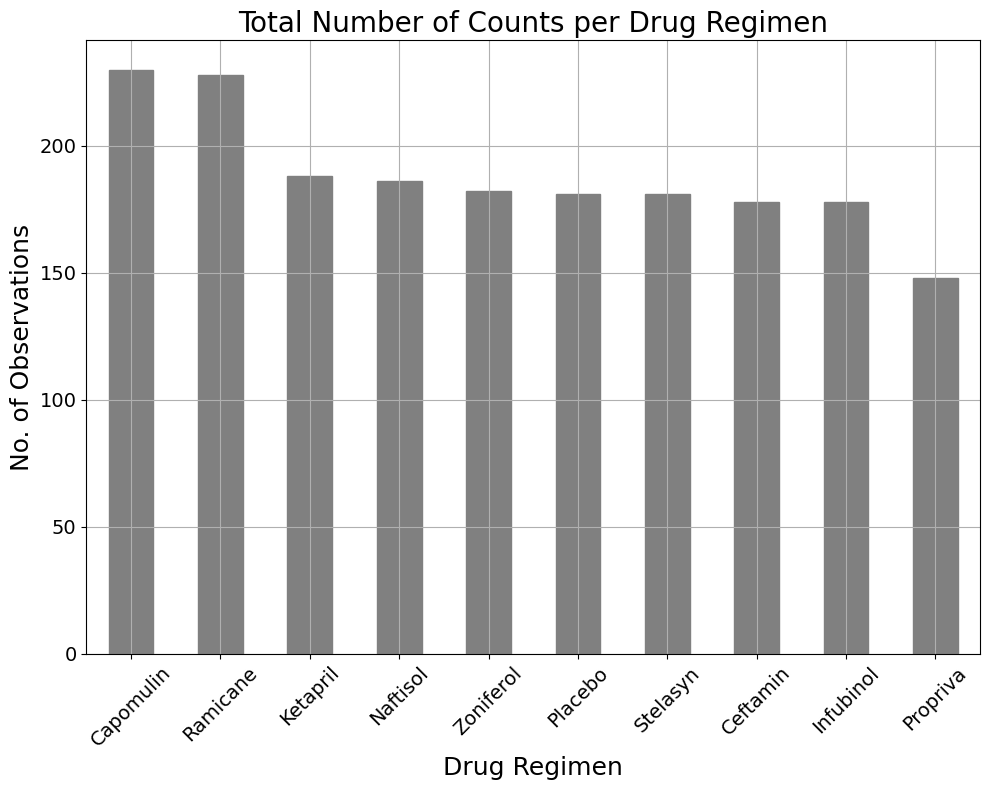

In [22]:
# Plotting with Pandas
bar_plot_pandas = regimen_counts_sorted.plot.bar(
    xlabel="Drug Regimen",
    ylabel="No. of Observations",
    title="Total Number of Counts per Drug Regimen",
    grid=True,
    color="grey",
    figsize=(10, 8),
    width=0.5,
    edgecolor='grey'
)

# Formatting
# Setting the title and label sizes more specifically
bar_plot_pandas.set_title("Total Number of Counts per Drug Regimen", fontsize=20)  # Increase title font size
bar_plot_pandas.set_xlabel("Drug Regimen", fontsize=18)  # Increase x-axis label font size
bar_plot_pandas.set_ylabel("No. of Observations", fontsize=18)  # Increase y-axis label font size
# Set font size for tick labels on both axes
bar_plot_pandas.tick_params(axis='both', labelsize=14)  # Font size of the tick labels
bar_plot_pandas.tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels to 45 degrees
# Applying tight layout
plt.tight_layout()

# Output to png
output_dir = 'Outputs'
png_file_name = 'bar_plot_pandas.png'
# Correct usage of savefig to save the plot
png_file_path = os.path.join(output_dir, png_file_name)
# Saving to the 'Outputs' folder
bar_plot_pandas.figure.savefig(png_file_path)

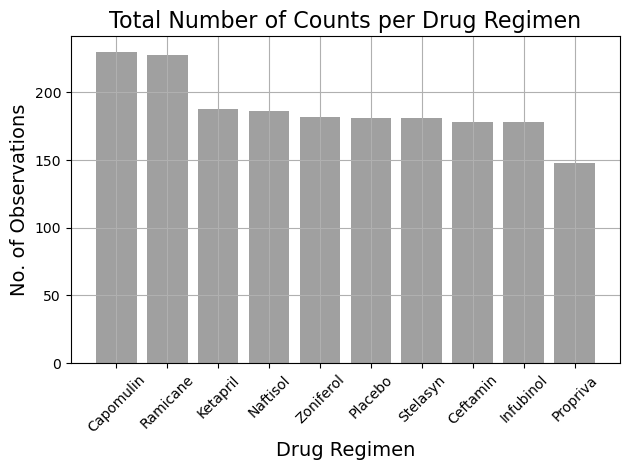

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Generate the figure, axis and grid
fig, bar_plot_pyplot=plt.subplots()
bar_plot_pyplot.grid(True)

# Adding titles
bar_plot_pyplot.set_title("Total Number of Counts per Drug Regimen", fontsize=16)  # Increase title font size
bar_plot_pyplot.set_xlabel("Drug Regimen", fontsize=14)  # Increase x-axis label font size
bar_plot_pyplot.set_ylabel("No. of Observations", fontsize=14)  # Increase y-axis label font size
bar_plot_pyplot.tick_params(axis='x', labelrotation=45)

# Plotting the data
bar_plot_pyplot.bar(
    regimen_counts_sorted.index, 
    regimen_counts_sorted.values, 
    color='grey', 
    alpha=0.75
)

# # Applying tight layout
plt.tight_layout()

# Output to png
output_dir = 'Outputs'
png_file_name = 'bar_plot_pyplot.png'
# Save the plot
png_file_path = os.path.join(output_dir, png_file_name)
# Saving to the 'Outputs' folder
bar_plot_pyplot.figure.savefig(png_file_path)


In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Group and count
gender_distribution=clean_data_df['Sex'].value_counts()
gender_distribution

Sex
Male      958
Female    922
Name: count, dtype: int64

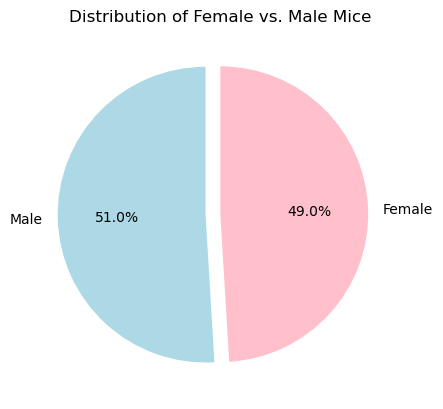

In [25]:
# Plot using Pandas
pie_plot_pandas = gender_distribution.plot.pie(
   autopct='%1.1f%%',
   startangle=90,
   colors=['#add8e6', 'pink'],
   title='Distribution of Female vs. Male Mice',
   explode= (0.1, 0)
)
# Remove the y-label - it is unnecessary
plt.ylabel('')

# Output to png
output_dir = 'Outputs'
png_file_name = 'pie_plot_pandas.png'
# Save the plot
png_file_path = os.path.join(output_dir, png_file_name)
# Saving to the 'Outputs' folder
pie_plot_pandas.figure.savefig(png_file_path)


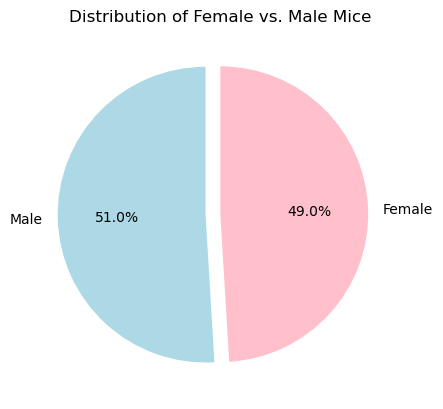

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Data for pie plot - a slightly different way to the approach taken in the pie Pandas example (variables created)
sizes = gender_distribution.values
labels = gender_distribution.index
colours = ['#add8e6', 'pink']
explode = (0.1, 0)
startangle = 90
autopct='%1.1f%%'

# Create the pie plot
fig, pie_plot_pyplot=plt.subplots()
pie_plot_pyplot.pie(sizes,
    labels=labels, 
    colors=colours, 
    explode=explode, 
    startangle=startangle,
    autopct=autopct
)

# Add a title
plt.title('Distribution of Female vs. Male Mice')

# Output to png
output_dir = 'Outputs'
png_file_name = 'pie_plot_pyplot.png'
# Save the plot
png_file_path = os.path.join(output_dir, png_file_name)
# Saving to the 'Outputs' folder
pie_plot_pyplot.figure.savefig(png_file_path)

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Specify regimens of interest
treatments=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter
clean_data_filtered_df= clean_data_df[clean_data_df['Drug Regimen'].isin(treatments)]

# Start by getting the last (greatest) timepoint for each mouse
# Identify the final timepoint for each mouse
final_timepoints=clean_data_filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes=pd.merge(final_timepoints, clean_data_filtered_df, how='left', on=['Mouse ID', 'Timepoint'])

print(final_tumor_volumes)


   Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      a203         45           67.973419                 2    Infubinol   
1      a251         45           65.525743                 1    Infubinol   
2      a275         45           62.999356                 3     Ceftamin   
3      a411         45           38.407618                 1     Ramicane   
4      a444         45           43.047543                 0     Ramicane   
..      ...        ...                 ...               ...          ...   
95     y769         45           68.594745                 4     Ceftamin   
96     y793         45           31.896238                 2    Capomulin   
97     y865         45           64.729837                 3     Ceftamin   
98     z578         45           30.638696                 0     Ramicane   
99     z581         45           62.754451                 3    Infubinol   

       Sex  Age_months  Weight (g)  
0   Female          20          23  
1

In [28]:
# Put treatments into a list for for loop (and later for plot labels) - done above 'treatment_filter'

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Output to txt file
output_dir = 'Outputs'
txt_file_name = 'iqr.txt'
# Save the plot
txt_file_path = os.path.join(output_dir, txt_file_name)

# Open and write to txt file
with open(txt_file_path, 'w') as file:
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Loop through each drug regimen
    for treatment in treatments:
        
        # Filter each drug regimen's final tumor volume
        treatment_subset=final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
        
        # Add treatment_subset to the tumor_vol_data list
        tumor_vol_data.append(treatment_subset)

        # Calculate the IQR
        quartiles = treatment_subset.quantile([.25, .5, .75])
        first_quartile = quartiles[0.25]
        third_quartile = quartiles[0.75]
        iqr = third_quartile - first_quartile

        print(f"{treatment} IQR data:")
        print(f"The lower quartile (Q1 - 25th percentile) of final tumour volumes is: {first_quartile}")
        print(f"The upper quartile (Q3 - 75th percentile) of final tumour volumes is: {third_quartile}")
        print(f"The interquartile range (IQR) of final tumour volumes is: {iqr}")
        print(f"The median of final tumour volumes is: {quartiles[0.5]}")

        file.write(f"{treatment} IQR data:\n")
        file.write("===========================================================================================\n")
        file.write(f"The lower quartile (Q1 - 25th percentile) of final tumour volumes is: {first_quartile}\n")
        file.write(f"The upper quartile (Q3 - 75th percentile) of final tumour volumes is: {third_quartile}\n")
        file.write(f"The interquartile range (IQR) of final tumour volumes is: {iqr}\n")
        file.write(f"The median of final tumour volumes is: {quartiles[0.5]}\n")

        # Determine bounds for outliers
        lower_bound = first_quartile - (1.5*iqr)
        upper_bound = first_quartile + (1.5*iqr)
        print(f"Values below {lower_bound} or above {upper_bound} could be outliers.\n")
        file.write(f"Values below {lower_bound} or above {upper_bound} could be outliers.\n")

        # Determine outliers based in logic presented above
        outliers= treatment_subset[(treatment_subset < lower_bound) | (treatment_subset > upper_bound)]

        if not outliers.empty:
            print(f"Potential outliers: {outliers.values}\n")
            file.write(f"Potential outliers: {outliers.values}\n")
            file.write("===========================================================================================\n")
        else:
            print("No potential outliers detected.\n")
            file.write("No potential outliers detected.\n")
            file.write("===========================================================================================\n")



Capomulin IQR data:
The lower quartile (Q1 - 25th percentile) of final tumour volumes is: 32.37735684
The upper quartile (Q3 - 75th percentile) of final tumour volumes is: 40.1592203
The interquartile range (IQR) of final tumour volumes is: 7.781863460000004
The median of final tumour volumes is: 38.1251644
Values below 20.70456164999999 or above 44.05015203000001 could be outliers.

Potential outliers: [47.68596303 46.53920617]

Ramicane IQR data:
The lower quartile (Q1 - 25th percentile) of final tumour volumes is: 31.56046955
The upper quartile (Q3 - 75th percentile) of final tumour volumes is: 40.65900627
The interquartile range (IQR) of final tumour volumes is: 9.098536719999998
The median of final tumour volumes is: 36.56165229
Values below 17.912664470000003 or above 45.20827463 could be outliers.

Potential outliers: [45.22086888]

Infubinol IQR data:
The lower quartile (Q1 - 25th percentile) of final tumour volumes is: 54.04860769
The upper quartile (Q3 - 75th percentile) of f

In [29]:
tumor_vol_data

[9     38.982878
 12    38.939633
 24    30.485985
 25    37.074024
 26    40.159220
 32    47.685963
 33    37.311846
 34    38.125164
 35    38.753265
 45    41.483008
 49    38.846876
 51    28.430964
 53    33.329098
 64    46.539206
 65    32.377357
 68    41.581521
 70    23.343598
 72    40.728578
 73    34.455298
 78    31.023923
 82    40.658124
 83    39.952347
 88    36.041047
 90    28.484033
 96    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 3     38.407618
 4     43.047543
 5     38.810366
 7     32.978522
 16    38.342008
 17    33.397653
 19    37.311236
 21    40.659006
 27    29.128472
 29    33.562402
 30    36.374510
 37    31.560470
 38    36.134852
 40    22.050126
 50    30.564625
 54    31.095335
 62    45.220869
 63    36.561652
 66    37.225650
 67    43.419381
 71    30.276232
 77    40.667713
 87    43.166373
 94    44.183451
 98    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0     67.973419
 1     65.525743
 6     57.031862
 8     66.083

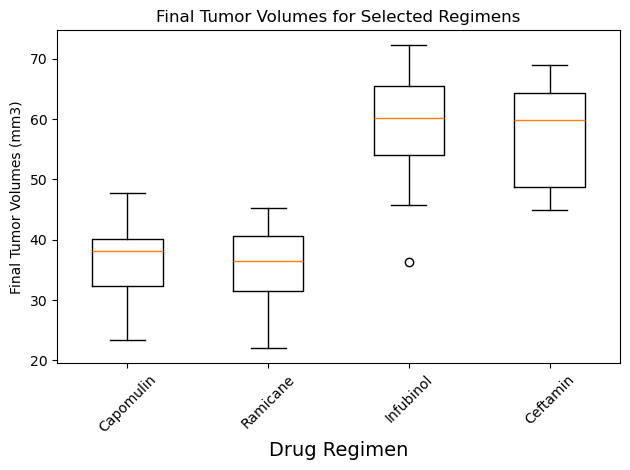

In [30]:
# Create a box plot for the distribution of tumor volumes for each treatment group
fig, box_plots = plt.subplots()
box_plots.set_title("Final Tumor Volumes for Selected Regimens")
box_plots.set_ylabel("Final Tumor Volumes (mm3)")
box_plots.set_xlabel("Drug Regimen", fontsize=14)

# Generate the boxplot
box_plots.boxplot(tumor_vol_data, labels=treatments, widths=0.5)

# Setting x-axis tick labels with rotation
plt.xticks(rotation=45)

# Applying tight layout before saving to adjust subplots automatically to give enough space to elements like labels
plt.tight_layout()

# Use plt.show() to display the plot
plt.show()

# Define output directory and file name
output_dir = 'Outputs'
png_file_name = 'box_plots.png'
png_file_path = os.path.join(output_dir, png_file_name)

# Save the plot
# It's crucial to apply any figure-wide adjustments like tight_layout before this step
fig.savefig(png_file_path)


## Line and Scatter Plots

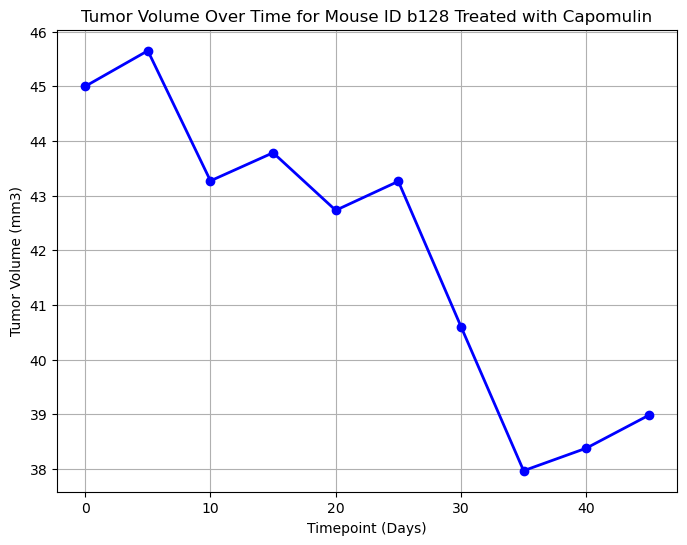

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter for Capomulin data
capomulin_data = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin']

# Optionally, select a specific mouse by ID, here I choose the first one for demonstration
mouse_id = capomulin_data['Mouse ID'].iloc[0]
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generate a line plot of tumor volume vs. time point for the selected mouse
plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-', linewidth=2)

# Adding title and labels
plt.title(f"Tumor Volume Over Time for Mouse ID {mouse_id} Treated with Capomulin")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.grid(True)

# Use plt.show() to display the plot
plt.show()

# Define output directory and file name
output_dir = 'Outputs'
png_file_name = 'tumour_volume_versus_time_per_mouse.png'
png_file_path = os.path.join(output_dir, png_file_name)

# Save the plot
# It's crucial to apply any figure-wide adjustments like tight_layout before this step
fig.savefig(png_file_path)

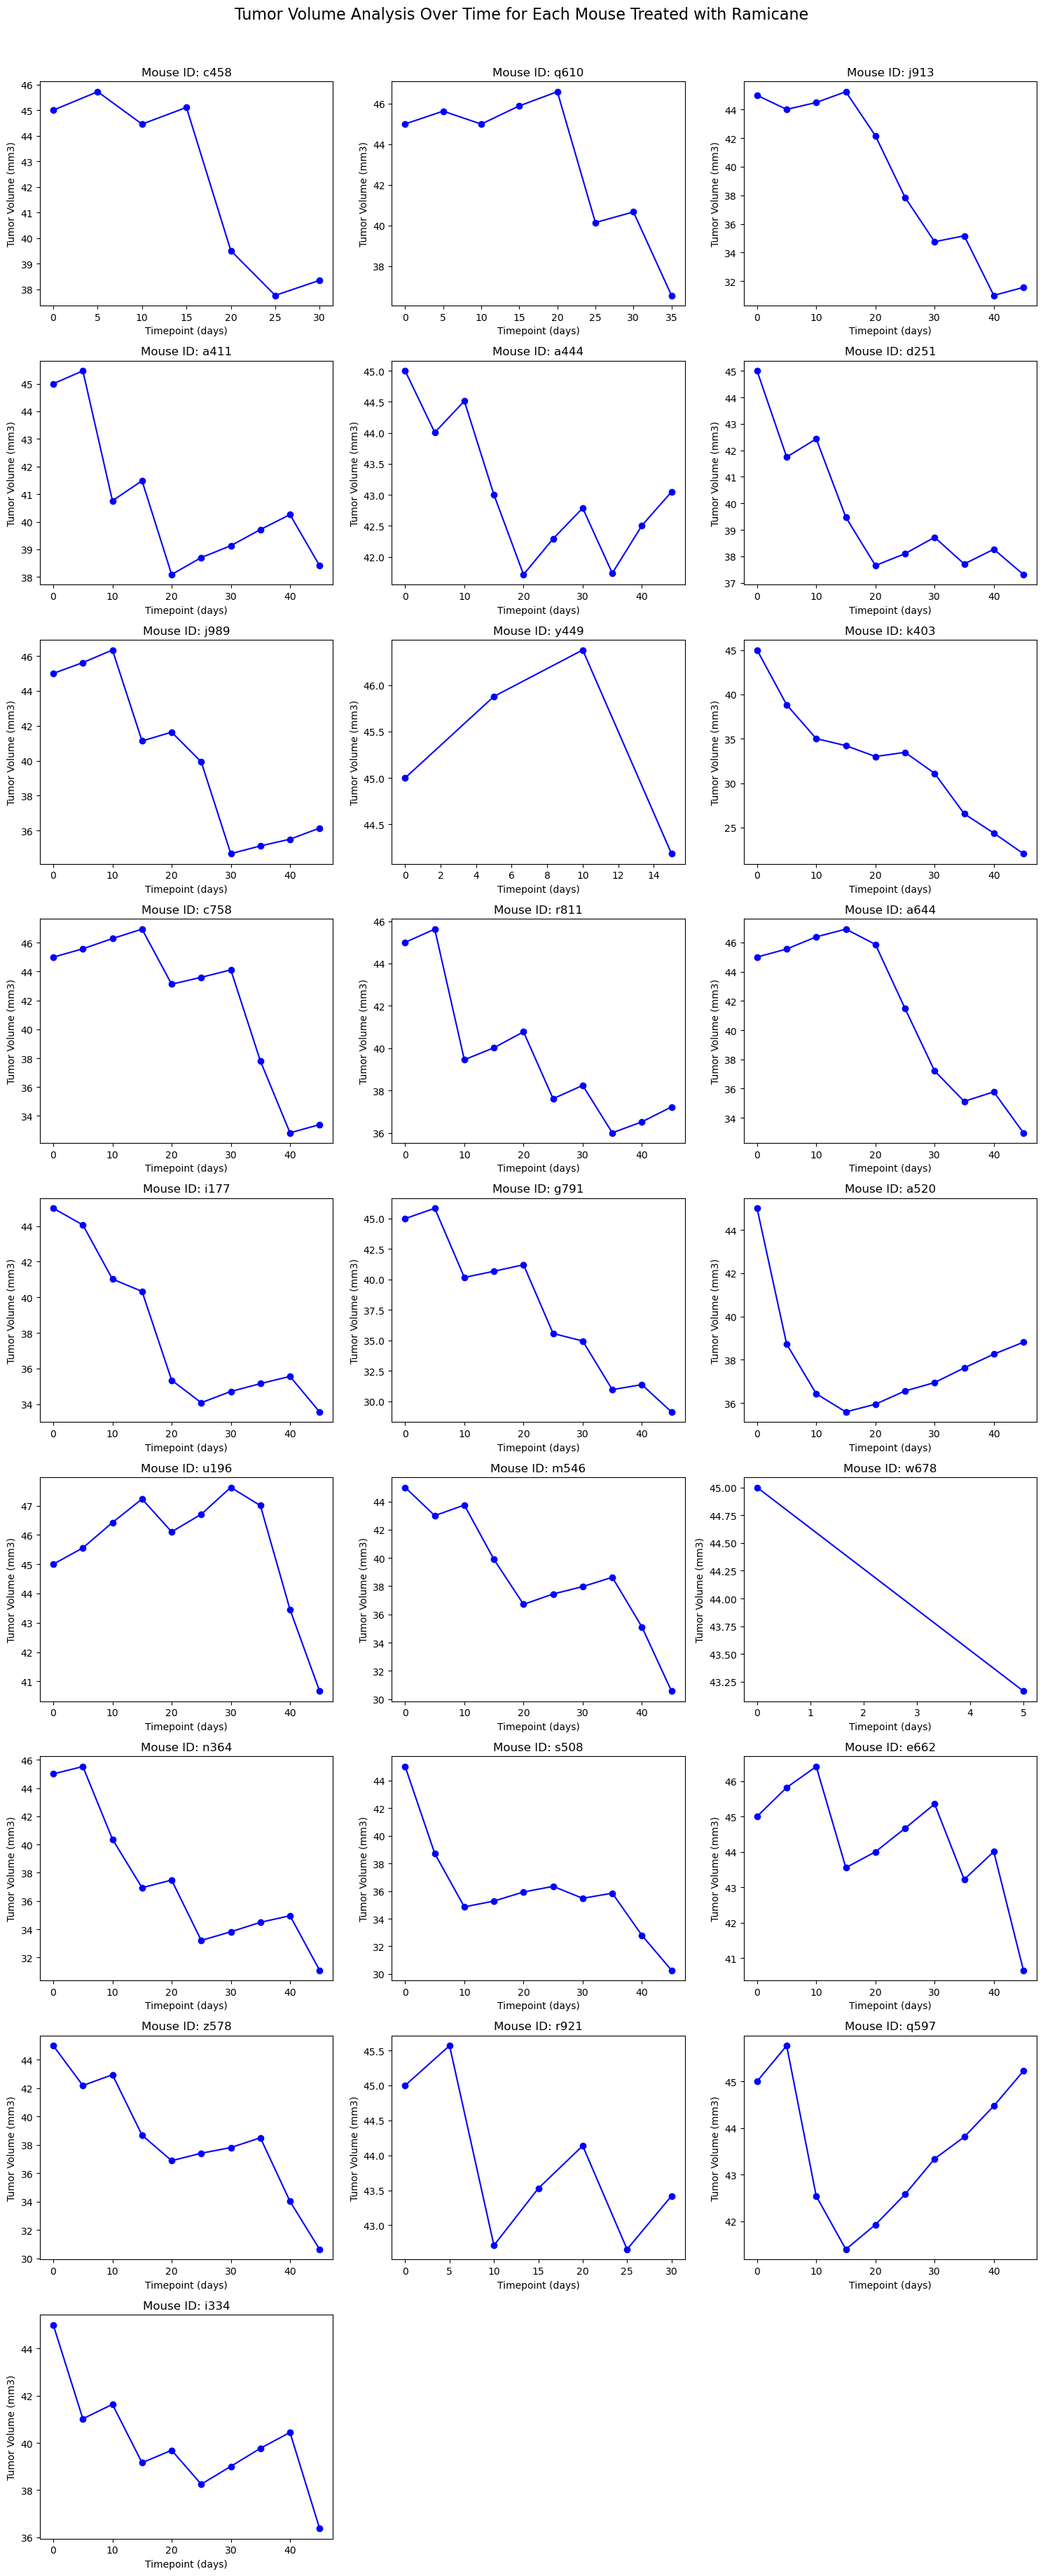

In [32]:
# Extra plotting

list_of_drug_regimens=list(clean_data_df["Drug Regimen"].unique())

drug_regimen_choice=input(f"What drug regimen are you interested in? {list_of_drug_regimens}")

# Filter for Capomulin data
user_selected_data = clean_data_df[clean_data_df['Drug Regimen'] == drug_regimen_choice]

# Get unique mouse IDs treated with Capomulin
mouse_ids = user_selected_data['Mouse ID'].unique()

# Number of mice
num_mice = len(mouse_ids)
num_cols = 3  # Define number of columns in subplot grid
num_rows = (num_mice + num_cols - 1) // num_cols  # Calculate required number of rows to fit all plots

# Create a large figure to hold all subplots
fig = plt.figure(figsize=(5 * num_cols, 4 * num_rows))

for index, mouse_id in enumerate(mouse_ids, start=1):
    mouse_data = user_selected_data[user_selected_data['Mouse ID'] == mouse_id]
    
# Create subplot for each mouse
    plt.subplot(num_rows, num_cols, index)
    plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
    plt.title(f"Mouse ID: {mouse_id}")
    plt.xlabel('Timepoint (days)')
    plt.ylabel('Tumor Volume (mm3)')
    plt.tight_layout()  # Adjust subplots to fit into figure area nicely

# Add an overall title
fig.suptitle(f'Tumor Volume Analysis Over Time for Each Mouse Treated with {drug_regimen_choice}', fontsize=16, y=1.02)

# Use plt.show() to display the plot
plt.show()

# Define output directory and file name
output_dir = 'Outputs'
png_file_name = 'tumour_volume_versus_time_multiple_plots.png'
png_file_path = os.path.join(output_dir, png_file_name)

# Save the plot
# It's crucial to apply any figure-wide adjustments like tight_layout before this step
fig.savefig(png_file_path, bbox_inches='tight')

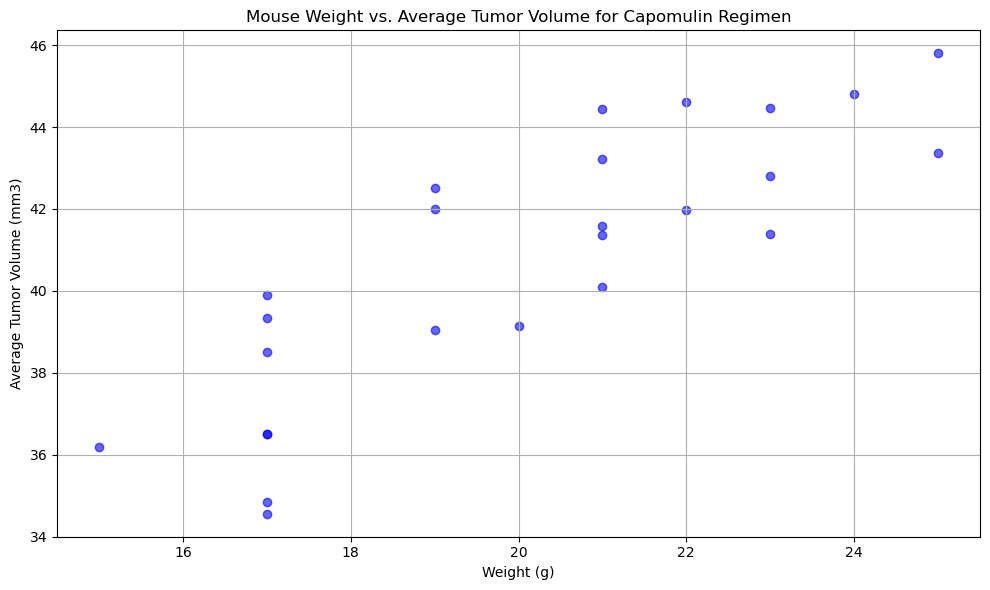

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group by Mouse ID to find average tumor volume and get the weight of each mouse
average_tumor_vol = capomulin_data.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Weight=('Weight (g)', 'mean')  # Assuming weight doesn't change, we can use 'mean' just to simplify the extraction
)

# Generate a scatter plot of mouse weight versus average tumor volume
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(average_tumor_vol['Weight'], average_tumor_vol['Average_Tumor_Volume'], color='blue', alpha=0.6)

# Adding plot title and labels
ax.set_title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Average Tumor Volume (mm3)')
ax.grid(True)

# Applying tight layout before saving to adjust subplots automatically to give enough space to elements like labels
plt.tight_layout()

# Show plot
plt.show()

# Ensure the output directory exists
output_dir = 'Outputs'

# Define file path for saving
png_file_name = 'scatter_basic_plots.png'
png_file_path = os.path.join(output_dir, png_file_name)

# Save the plot with additional space for the suptitle
fig.savefig(png_file_path)

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84
Linear regression model: y = 0.95x + 21.55


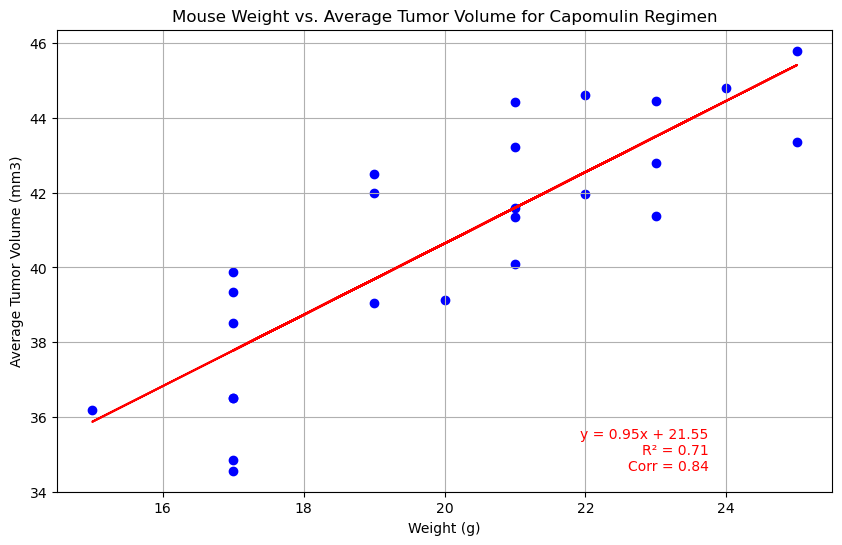

In [34]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Calculate the Pearson correlation coefficient
correlation = average_tumor_vol['Weight'].corr(average_tumor_vol['Average_Tumor_Volume'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation:.2f}")

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(average_tumor_vol['Weight'], average_tumor_vol['Average_Tumor_Volume'])
print(f"Linear regression model: y = {slope:.2f}x + {intercept:.2f}")

# Generate the figure and its axis
fig, scatter_plot = plt.subplots(figsize=(10, 6))

# Scatter plot of the data
scatter_plot.scatter(average_tumor_vol['Weight'], average_tumor_vol['Average_Tumor_Volume'], color='blue')

# The regression line
scatter_plot.plot(average_tumor_vol['Weight'], intercept + slope * average_tumor_vol['Weight'], 'r')

# Annotations
scatter_plot.text(x=max(average_tumor_vol['Weight']) * 0.95, y=min(average_tumor_vol['Average_Tumor_Volume']),
        s=f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}\nCorr = {correlation:.2f}",
        color='red', ha='right')

# Setting the title and labels
scatter_plot.set_title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
scatter_plot.set_xlabel('Weight (g)')
scatter_plot.set_ylabel('Average Tumor Volume (mm3)')
scatter_plot.grid(True)

# Show the plot on the display
plt.show()

# Define the output directory and filename
output_dir = 'Outputs'
png_file_name = 'scatter_regression.png'

# Full path for saving the file
png_file_path = os.path.join(output_dir, png_file_name)

# Save the plot as a PNG file
fig.savefig(png_file_path)

## Additional Analyses

To evaluate the success of the drug regimens, one can focus on two main indicators:
- Change in tumour volume over time
- Number of metastatic sites reported

To evaluate this, the following analyses were performed:
1. Average Tumor Volume by Drug: This is done below by calculating the mean tumor volume for each drug regimen at the latest timepoint available to see which drugs are associated with the smallest tumor sizes.
2. Metastatic Spread: This is done below by calculating the average number of metastatic sites for each drug regimen to evaluate how well the drug prevents cancer spread.

In [35]:
# Start by getting the last (greatest) timepoint for each mouse
final_timepoints_unfiltered = clean_data_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes_unfiltered = pd.merge(final_timepoints_unfiltered, clean_data_df, how='left', on=['Mouse ID', 'Timepoint'])

final_tumor_volumes_unfiltered


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [36]:
# 1. Average Tumor Volume by Drug:

# Define the output directory and filename
output_dir = 'Outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Calculate the average number of metastatic sites for each drug regimen
ave_final_tumor_volumes = final_tumor_volumes_unfiltered.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

# Save the data to CSV
ave_final_tumor_volumes.to_csv(f'{output_dir}/ave_final_tumour_vol_sites.csv')

# Plot the average metastatic sites
plt.figure(figsize=(10, 5))
ave_final_tumor_volumes.plot(kind='bar', color='red')
plt.title('Average Final Tumour Volumes by Drug Regimen')
plt.ylabel('Tumour Volumes (mm3)')

# Applying tight layout
plt.tight_layout()
plt.savefig(f'{output_dir}/ave_final_tumour_vol_chart.png')  # Save the plot
plt.close()  # Close the plot to free up resources

In [38]:
# No. Metastatic Sites per Mouse ID
metastatic_site_count=clean_data_df.groupby(['Drug Regimen', 'Mouse ID']).size().reset_index(name='Count')
metastatic_site_count

,Drug Regimen,Mouse ID,Count
0,Capomulin,b128,10
1,Capomulin,b742,10
2,Capomulin,f966,5
3,Capomulin,g288,10
4,Capomulin,g316,10
...,...,...,...
243,Zoniferol,q633,10
244,Zoniferol,s337,10
245,Zoniferol,w140,2
246,Zoniferol,w575,10


In [41]:

# 2. Metastatic Spread:

# Define the output directory and filename
output_dir = 'Outputs'

# Calculate the average number of metastatic sites for each drug regimen
average_met_sites = metastatic_site_count.groupby('Drug Regimen')['Count'].mean()

# Save the data to CSV
average_met_sites.to_csv(f'{output_dir}/ave_metastatic_sites.csv')

# Plot the average metastatic sites
plt.figure(figsize=(10, 5))
average_met_sites.plot(kind='bar', color='green')
plt.title('Average Metastatic Sites by Drug Regimen')
plt.ylabel('Number of Metastatic Sites')

# Applying tight layout
plt.tight_layout()

# Output to png
# Save the plot
png_file_name = 'ave_metastatic.png'
png_file_path = os.path.join(output_dir, png_file_name)
plt.savefig(png_file_path)  # Use plt.savefig to save the plot
plt.close()  # Close the plot to free up memory